## Task
<b>Q. On which level are players most likely to fail?</b>

<b>You should consider the statistical significance of your answer carefully.</b>

<b>You should include any code used to process the data and any calculations used to compute
an answer.</b>

In [1]:
# Importing important libraries at first, other libraries could be importes later as per requirements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

df = pd.read_csv("level_progress.csv")

<b>Baisc check for the dataset</b>

In [3]:
df.shape

(55826, 5)

In [4]:
df.head()

,event_datetime,player_id,level_number,status,session_id
0,2020-11-28 21:00:24.958000,00020eac3d7e4f058b87eac1a9a85c25,6,complete,6ddf006b807e451eb4706d6d98a049b6
1,2020-11-27 22:03:03.048000,00020eac3d7e4f058b87eac1a9a85c25,2,start,3ba98db705f2aa0bc406441a61c23b3c
2,2020-11-26 14:53:09.344000,002188c0bc476f356f4c3b74e5cc66c8,1,start,25cf292a8f1d3da01df8371276502edf
3,2020-12-03 11:43:26.582000,00576ef3617e6bbbabfa0b1090e4122d,1,start,21fd6a7db53a9220574563ac8a8c8b58
4,2020-12-04 14:23:07.448000,00576ef3617e6bbbabfa0b1090e4122d,7,start,358b9ab5c1c0f08bc7def310411eb90f


In [5]:
# Check for types of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55826 entries, 0 to 55825
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_datetime  55826 non-null  object
 1   player_id       55826 non-null  object
 2   level_number    55826 non-null  int64 
 3   status          55826 non-null  object
 4   session_id      55826 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [6]:
# statiscal summary for numerical columns

df.describe()

,level_number
count,55826.000000
mean,5.991778
std,5.988455
min,0.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,49.000000


In [8]:
# Check for null values

df.isna().sum()

event_datetime    0
player_id         0
level_number      0
status            0
session_id        0
dtype: int64

In [32]:
# Check for duplicat fields if any

df.duplicated().unique()

array([False])

### Univariate Analysis

<b>1. Lets first find the total number of players</b>

In [62]:
len(df['player_id'].unique())

3872

<b>2. Next we will find how many sessions were played</b>

In [64]:
len(df['session_id'].unique())

12759

<b>3. The level which is most number of times reached by the players</b>

In [65]:
df['level_number'].value_counts().head()

1    7161
3    6974
2    6297
4    5138
5    4482
Name: level_number, dtype: int64

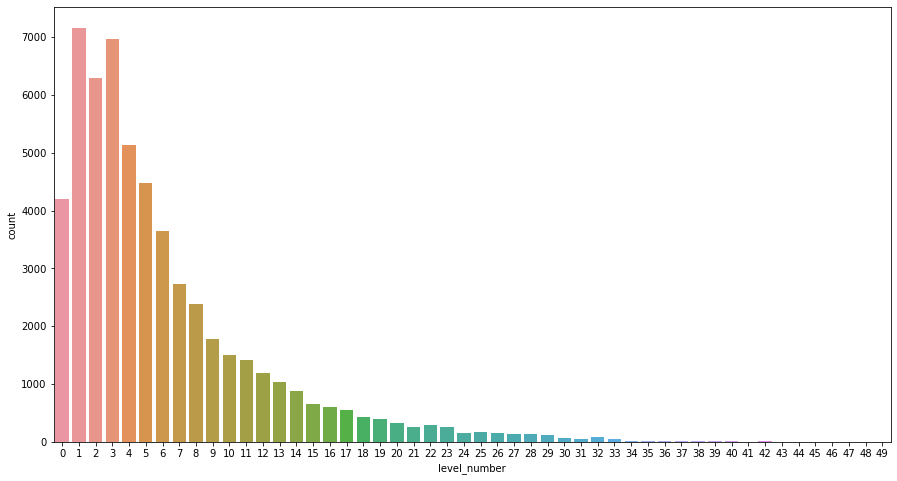

In [60]:
plt.figure(figsize=(15,8))
sns.countplot(df['level_number'])

<b>4. Number of total status present in the dataset</b>

In [16]:
df['status'].value_counts()

start       31109
complete    20571
fail         4146
Name: status, dtype: int64

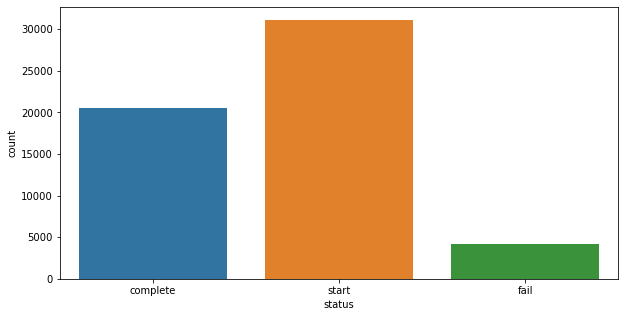

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(df['status'])

<b>5. Total number of sessions played during past ~30 days</b>

In [70]:
len(df['session_id'].unique())

12759

### Multivariate Analysis

<b>1. Lets check different stages of status at different levels</b> 

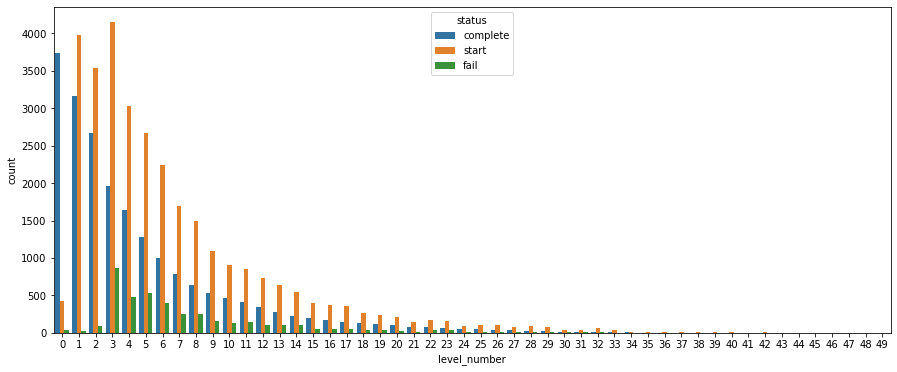

In [79]:
plt.figure(figsize=(15,6))
sns.countplot('level_number', hue='status', data=df)

### Target Question

<b>Lets separate the level that contains only 'fail' value in the field 'status' and store it in a different dataframe to avoid any alteration in original dataset<b/>

In [34]:
df1 = df[df['status']=='fail']

In [35]:
df1

,event_datetime,player_id,level_number,status,session_id
37,2020-11-18 09:10:58.541000,000948918c5ed8e1dd02e3c8fcbcae8e,4,fail,d2ccda83d3df92b31d37189e1b2a078b
47,2020-11-22 16:28:43.209000,005fde66a4f93e41b628fa76290fff6b,3,fail,8e365c77bb39dddcd2860c3ed9f36c71
57,2020-11-21 06:55:10.842000,00b3c8d004f34341f938ce84bedc6cdd,4,fail,79038897ae864fdeaf4263b1abd129e2
71,2020-11-20 21:30:34.097000,0094f5714dd17f0f0f3f45b9cd40ed23,8,fail,bad109a7bdb5a2607093daefdd72e722
76,2020-11-22 09:24:38.748000,0035ff83e7e08d77a7808bd150147927,4,fail,547e380d14c18fd714e0d3b0999c6a77
...,...,...,...,...,...
55763,2020-11-29 20:56:02.994000,009988c45e50a5097bfa830efc97ff67,14,fail,1762ec0d1c3500d331021adc76bcbbd3
55773,2020-11-24 19:39:37.128000,0019485b30269fc2f8bc628c2353d7b4,14,fail,a730a6eac5dc1809fbc0752b3507db08
55789,2020-11-25 13:22:42.305000,00994f0100254bba16038c60f74f27af,10,fail,593ca3ebae873c74487eecfe9b93dfbd
55808,2020-11-28 16:19:46.427000,0024e49845f1641605b2f8715a0e77f6,3,fail,c345ebf07a9c26b872f6e7ecf1e37e86


<b>As columns 'event_datetime', 'player_id' and 'session_id' are of no use to us, so we wil drop them </b>

In [37]:
df1.drop(['event_datetime','player_id','session_id'], axis=1, inplace=True)

C:\Users\ashwi\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
df1.head()

,level_number,status
37,4,fail
47,3,fail
57,4,fail
71,8,fail
76,4,fail


In [81]:
df1['level_number'].value_counts()

3     865
5     537
4     475
6     400
8     255
7     255
9     157
11    147
10    127
13    111
12    109
14    105
2      91
17     56
16     55
15     53
23     39
19     39
0      37
22     37
18     36
20     21
1      20
21     18
26     15
24     11
25     10
29     10
27      9
32      9
28      9
30      7
31      6
33      5
35      3
42      2
38      2
39      1
44      1
37      1
Name: level_number, dtype: int64

In [82]:
# Total count of failures in the dataset 

df1['level_number'].value_counts().sum()

4146

In [91]:
# Percentage of failures in Level 3, 4, 5 and 6

df1['level_number'].value_counts().head(4).sum() / 4146

0.5492040520984081

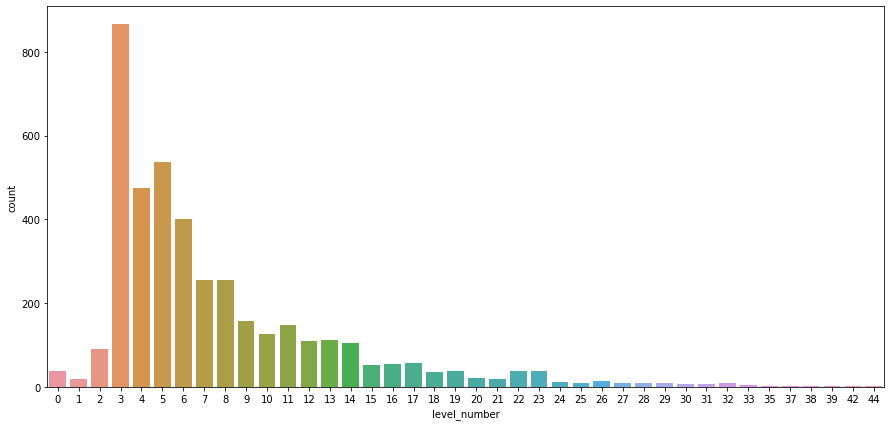

In [55]:
plt.figure(figsize=(15,7))
sns.countplot(df1['level_number'])

## Conclusion

From our analysis of past data it is pretty clear that, players are most likely to fail on <b>Level 3</b> 